In [1]:
import numpy as np
import matplotlib.pyplot as plt
# this script is to get velocity RMS curve 

In [2]:
# note that the results ''2.0-1.0-misfit.out', '1.0-20.0-rms.out'...' are from change_data_condition.sh
import os
path = './'
files = os.listdir(path)
print(files)

['2.0-1.0-misfit.out', '1.0-20.0-rms.out', '1.0-0.2-rms.out', '0.1-1.0-misfit.out', '1.0-10.0-rms.out', '20.0-1.0-rms.out', '1.0-10.0-misfit.out', '1.0-30.0-rms.out', '10.0-1.0-rms.out', '0.5-1.0-rms.out', '1.0-0.2-misfit.out', '1.0-0.1-rms.out', '10.0-1.0-misfit.out', '0.5-1.0-misfit.out', '1.0-0.5-misfit.out', '2.0-1.0-rms.out', '5.0-1.0-misfit.out', '1.0-0.1-misfit.out', 'res_rms.ipynb', '0.2-1.0-rms.out', '20.0-1.0-misfit.out', '30.0-1.0-rms.out', '1.0-1.0-rms.out', '0.1-1.0-rms.out', '1.0-5.0-rms.out', '30.0-1.0-misfit.out', '1.0-0.5-rms.out', '0.2-1.0-misfit.out', '5.0-1.0-rms.out', '1.0-2.0-misfit.out', 'vel_rms.ipynb', '1.0-30.0-misfit.out', '1.0-20.0-misfit.out', '1.0-5.0-misfit.out', '1.0-2.0-rms.out', '1.0-1.0-misfit.out']


In [3]:
result=[]
out_files=[]

for file in files:
    if file.endswith('1.0-rms.out'):
        # get *-rms.out 2nd column data
        out_files.append(file)
        with open(os.path.join(path, file), 'r') as f:
            lines = f.readlines()
            tmp = []
            for line in lines:
                # add rms to tmp
                tmp.append(np.log10(np.double(line.split()[2])))
            # add tmp to result
            result.append(tmp)
result

[[1.5442541306840103,
  1.4924181251011004,
  1.341513659870251,
  1.1482755770193012,
  1.1269232642282665,
  1.1096089160860294,
  1.043256147850749,
  0.9858672815094714,
  0.8864241658530472,
  0.8178184689855597,
  0.7856173709039599,
  0.7748321710059917,
  0.7571970581262301,
  0.7393127977106214,
  0.6837249813212354,
  0.669906079640315,
  0.6612673462951103,
  0.6565552648770603,
  0.6586990416919154,
  0.6404764678975793,
  0.6119154593833988,
  0.5936050233640711,
  0.5719206878901095,
  0.525284575104447,
  0.5144202346436896,
  0.5063142256297599,
  0.4870945194227263,
  0.4742891261654964,
  0.4633180265108874,
  0.4493549587027983,
  0.4360385451733869,
  0.4255097662916688,
  0.42428856684310967,
  0.4123378860197827,
  0.3982057155969341,
  0.38416337993350674,
  0.38254292317919425,
  0.37693264087807576,
  0.3719448055694523,
  0.37289360027166096,
  0.38062181777140525,
  0.3774665315317092,
  0.3681641119363735,
  0.3647198027299179,
  0.36396716645718546,
  0.359

In [4]:
# plot
result[2]

[1.5442541306840103,
 1.48644181428841,
 1.2086106337929587,
 1.1376610478144689,
 1.1331715187135811,
 1.1147277143718097,
 0.9911374351203118,
 0.8996727953090797,
 0.8210777052284404,
 0.7882299036221544,
 0.7733409550580419,
 0.751656252756493,
 0.7473986001610948,
 0.7379333339009807,
 0.7034985860465205,
 0.6622978024433519,
 0.6630645618312185,
 0.6481618494196857,
 0.6254832535879943,
 0.596215408493199,
 0.5766211898934105,
 0.5642374751789818,
 0.5388639204749459,
 0.5174730187603362,
 0.5049001871709721,
 0.4757728507180359,
 0.4577154104958826,
 0.4537401959284407,
 0.44455533850161866,
 0.4252504670106778,
 0.4094816956943365,
 0.4059522077106717,
 0.39579800616339234,
 0.38779367477192117,
 0.38082967082215224,
 0.388774156221372,
 0.38186924918321363,
 0.3789735500298954,
 0.3786177182472405,
 0.38180074250470286,
 0.380146092653019,
 0.3755081544308392,
 0.3728604734492555,
 0.36904693226293916,
 0.3710068719557083,
 0.3697704350100712,
 0.36959801684015836,
 0.37474468

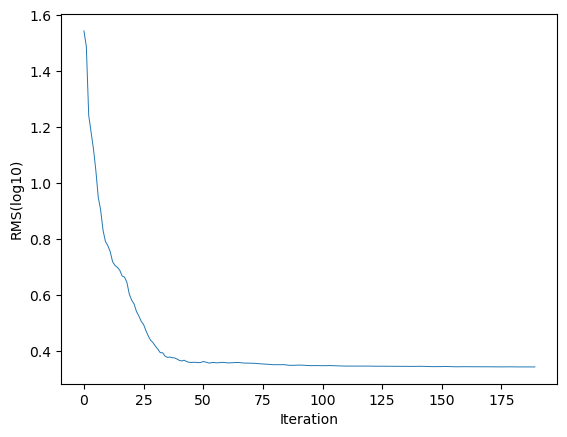

In [5]:
plt.figure()
zero_array=np.zeros(500)
plt.plot(result[1], linewidth=0.7)
plt.xlabel('Iteration')
plt.ylabel('RMS(log10)')
plt.show()

In [6]:
# split seis data weight parameter
seis_data_weight = []
for file in out_files:
    file_tag = np.double(file.split('-')[0])
    seis_data_weight.append(file_tag)
seis_data_weight

[20.0, 10.0, 0.5, 2.0, 0.2, 30.0, 1.0, 0.1, 5.0]

In [7]:
sort_index = np.argsort(seis_data_weight)
sort_index

array([7, 4, 2, 6, 3, 8, 1, 0, 5])

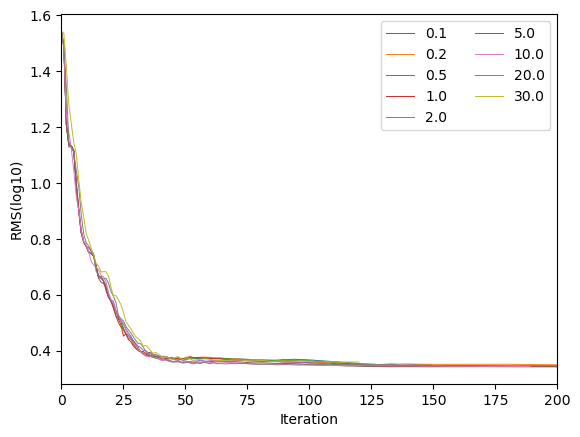

In [8]:
plt.figure()
zero_array=np.zeros(500)
plt.xlim([0,200])
for iter in sort_index:
    plt.plot(result[iter], linewidth=0.7, label=seis_data_weight[iter])
plt.xlabel('Iteration')
plt.ylabel('RMS(log10)')
plt.legend(ncol=2)
plt.show()